<div align="center">
    <h1> 🎯 LUMIOS 🎯</h1>
    <h3>Label Using Machine In Organic Samples</h3>
</div>



## Notebook Introduction ✍️

This notebook groups the codes for the preparation and training of the Convolutional Neural Network architecture integrated into the core of artificial intelligence in LUMIOS

##### ATTENTION: 
- 🚨This code needs TensorFlow installed in your environment.

## About the developer: 
### 👨🏽‍🏫 RAFAEL VIEIRA 
- Professor at the Instituto Federal de Rondônia, campus de Ji-Paraná. 

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><td>"Throughout my journey, I have always sought to integrate the richness of natural chemistry with promising Artificial Intelligence techniques, such as Machine Learning and Deep Learning. From this fusion, innovative solutions and discoveries have emerged."</td>
</td>
</tr>
</table><br/><br/><br/>

#### 📚 Libraries

In [1]:
import os
import tensorflow as tf
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [2]:
#### code for reprodutibility:
def reset_random_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
# make some random data
reset_random_seeds()

### 1.1 - Open Natural Products 🍃

In [3]:
nomes_amostras_NP = os.listdir('/Users/rafaelvieira/Downloads/LUMIOS - Notebook/images/NP')

In [4]:
len(nomes_amostras_NP)

6655

In [5]:
nomes_amostras_NP[0]

'NP_6473.png'

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><td>In the 'NP' folder, there are images that start with the prefix 'NP' followed by their respective numbering, all of them are in the .png format.</td>
</td>
</tr>
</table><br/><br/><br/>

### 1.1 - Path to the NP files. 🛣️

In [6]:
import cv2
imagens_NP = []
import os
for i in nomes_amostras_NP:
    nome = i
    path = '/Users/rafaelvieira/Downloads/LUMIOS - Notebook/images/NP' ## MACBOOK)
    endereco = os.path.join(path, nome)
#     print(endereco)
    img = cv2.imread(endereco)
    imagens_NP.append(img)

In [7]:
imagens_NP[2].shape

(100, 100, 3)

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><td>Molecule visualization.</td>
</td>
</tr>
</table><br/><br/><br/>

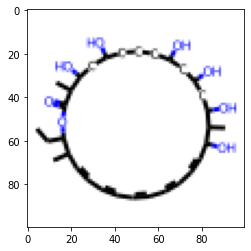

In [8]:
import matplotlib.pyplot as plt
plt.imshow(imagens_NP[2])

#### 🚨 Convolutional Neural Network transforms an input image into a pixel matrix, applies convolutional and pooling operations to extract features, and uses fully connected layers to make predictions. This hierarchical approach to feature extraction makes CNNs exceptionally powerful for a wide range of image-related tasks
⬇️

In [9]:
imagens_NP[2]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### 1.2 - Preparing the matrix containing the dimensions.
- The images are in color with dimensions 100x100. So we will create a matrix containing the number of samples and dimensions <b>100x100x3</b>.

In [10]:
import numpy as np
x_novo_NP = np.zeros((len(imagens_NP), 100, 100, 3)) # (n_amostras, (dimensao))

In [11]:
len(imagens_NP)

6655

In [12]:
len(x_novo_NP)

6655

In [13]:
problems = []
for i in range(len(imagens_NP)):
    try:
        x_novo_NP[i] = imagens_NP[i]
    except:
        print(i)
        problems.append(i)

In [14]:
x_novo_NP.shape

(6655, 100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


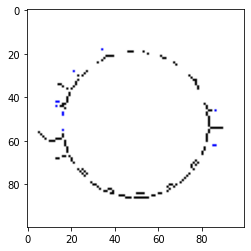

In [15]:
plt.imshow(x_novo_NP[2])

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><td>Normalize the data by dividing it by 255! This is a common approach for image preprocessing when pixel intensities range from 0 to 255, as is the case with RGB images. This helps scale the pixel values to the range [0, 1], which is often more suitable for training neural networks.</td>
</td>
</tr>
</table><br/><br/><br/>

In [16]:
## é necessário normalizar, dividir por 255

In [17]:
for i in range(x_novo_NP.shape[0]):
    x_novo_NP[i] = x_novo_NP[i]/250

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


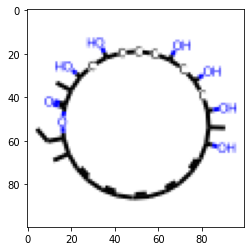

In [18]:
plt.imshow(x_novo_NP[2])

In [19]:
# plt.imshow(x_novo_fungos[10])

In [20]:
x_novo_NP.shape

(6655, 100, 100, 3)

### 1.3 -  y_teste_NP?

In [21]:
y_teste_NP = np.ones((len(x_novo_NP)))

In [22]:
len(y_teste_NP)

6655

In [23]:
y_teste_NP

array([1., 1., 1., ..., 1., 1., 1.])

### 1.4 - Open Drugs 💊

In [25]:
nomes_amostras_drugs = os.listdir('/Users/rafaelvieira/Downloads/LUMIOS - Notebook/images/drugs')

import cv2
imagens_drugs = []
import os
for i in nomes_amostras_drugs:
    nome = i
    path = '/Users/rafaelvieira/Downloads/LUMIOS - Notebook/images/drugs'
    endereco = os.path.join(path, nome)
    
#     print(endereco)
    img = cv2.imread(endereco)
    imagens_drugs.append(img)

In [26]:
len(nomes_amostras_drugs)

6654

In [27]:
# import cv2
# imagens_plantas = []
# for i in nomes_amostras_plantas:
#     endereco = r'C:\Users\PC\Desktop\Redes_Neurais_LUMIOS\imagens\drugs'
#     print(endereco)
#     img = cv2.imread(endereco)
#     imagens_plantas.append(img)

In [28]:
len(imagens_drugs)

6654

In [29]:
imagens_drugs[2].shape

(100, 100, 3)

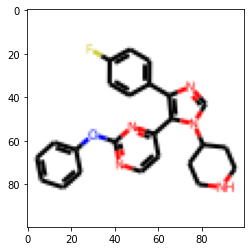

In [30]:
plt.imshow(imagens_drugs[1])

In [31]:
import numpy as np
x_novo_drugs = np.zeros((len(nomes_amostras_drugs), 100, 100, 3)) # (n_amostras, (dimensao))

In [32]:
defeito_drugs = []
for i in range(len(imagens_drugs)):
    try:
        x_novo_drugs[i] = imagens_drugs[i]
    except:
        print(i)
        defeito_drugs.append(i)

In [33]:
x_novo_drugs.shape

(6654, 100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


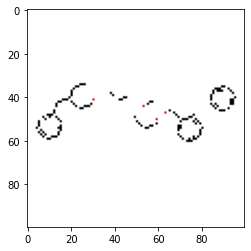

In [34]:
plt.imshow(x_novo_drugs[2])

In [35]:
for i in range(x_novo_drugs.shape[0]):
    x_novo_drugs[i] = x_novo_drugs[i]/250

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


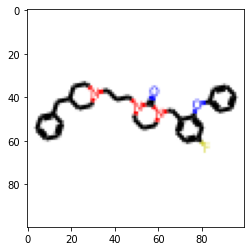

In [36]:
plt.imshow(x_novo_drugs[2])

drop the samples with problems (if necessary):

In [43]:
# x_novo_plantas = np.delete(x_novo_plantas, defeito_plantas, axis=0)

In [44]:
# x_novo_plantas.shape

### Preparyng y_test for drugs:
- drugs = class0

In [37]:
y_teste_drugs = np.zeros((len(x_novo_drugs)))
y_teste_drugs.shape

(6654,)

### 1.5 -  Concatenating the datasets 🤲

In [38]:
matriz = np.concatenate((x_novo_drugs, x_novo_NP))


In [39]:
matriz.shape

(13309, 100, 100, 3)

In [40]:
y = np.concatenate((y_teste_drugs, y_teste_NP))

In [41]:
y.shape

(13309,)

## 2.0. Create a **`Test Set`** 🏋🏽‍♂️
<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>Splitting a Dataset: Hold-out, random sampling, stratified sampling</td>
</tr>
</table><br/><br/>

_Splitting/sampling_ the dataset into a _training set_ and a ***testing set*** (also called _hold out set_) is crucial for developing of ML solutions. You train your solutions using the _training set_, and you test it using the _testing set_. <br/>
The error rate on new cases is called the **generalization error** (or out-of-sample error), and by evaluating your model on the test set, you get an _estimate_ of this error. <br/>
This value tells you _how well_ your model will perform on instances it has _never seen before_.

Many authors and machine learning practitioners **do not** perform this task _at this stage_ of the ML pipeline. <br/>
They typically use the **entire dataset** for data cleaning, preprocessing, and exploratory data analysis.


For example, when using the **entire dataset** to _impute_ missing values from a specific attribute with its median, one will be _snooping/looking at_ the _future test samples_. <br/>
Consequently, your estimate for the generalization error will be **biased**, and you will launch a system (in production) that _may not_ perform as well as expected. <br/>
This is called ***data snooping bias***. <br/>
Therefore, performing dataset sampling at this stage of the ML pipeline is recommended. <br/>

**OBSERVATIONS:**<br/>
However, there are _some concerns_ with that.

Suppose you have a dataset with 100 samples. <br/>
Initially, you randomly divide it into a **training set** (80 samples) and a **testing set** (20 samples). <br/>
Next, during _data cleaning_, you found out that the _training set_ has **5 samples with missing values** for a given attribute and **5 duplicated samples**. <br/>
Similarly, the _testing set_ has **8 samples with missing values** for the same attribute and **2 duplicated samples**. <br/>
You then decided **to remove _all_ these samples**, resulting in:
- training set with 70 samples
- testing set with 10 samples.

The dataset has changed (80 samples) and, consequently, the _initial proportion_ of the train and test sets too: _80%_ to ___87.5%___ (70/80), and _20%_ to ___12.5%___ (10/80). <br/>
This can impact model training and/or assessment in the _testing set_. <br/>

A _reasonable strategy_ is to perform any _data cleaning tasks_ that **remove samples** -- _e.g._, duplicated samples, samples with missing values, outliers, etc -- across the _entire dataset_ **before** splitting it into. <br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>It is common to use 80% of the data for training and 20% for testing. However, this depends on the size of the dataset: if it contains 10 million instances, then holding out 1% means your test set will contain 100,000 instances, probably more than enough to get a good estimate of the generalization error.</td>
</tr>
</table><br/><br/>

In [43]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(matriz, y, test_size = 0.2, random_state=42)

In [72]:
# x_treino

In [73]:
# import os

# out_dir = '/Users/rafaelvieira/Documents/GitHub/CNN_Moléculas'

# if not os.path.exists(out_dir):
#     os.makedirs(out_dir)
    

# np.save(os.path.join(out_dir, 'train_data_125x220x3.npy'), x_treino)
# np.save(os.path.join(out_dir, 'train_labels.npy'), y_treino)


# np.save(os.path.join(out_dir, 'test_data_125x220x3.npy'), x_teste)
# np.save(os.path.join(out_dir, 'test_labels.npy'), y_teste)

In [74]:
import numpy as np

In [75]:
# X_train = np.load('/Users/rafaelvieira/Documents/GitHub/CNN_Moléculas/train_data_125x220x3.npy')
# y_train = np.load('/Users/rafaelvieira/Documents/GitHub/CNN_Moléculas/train_labels.npy')

# X_test = np.load('/Users/rafaelvieira/Documents/GitHub/CNN_Moléculas/test_data_125x220x3.npy')
# y_test = np.load('/Users/rafaelvieira/Documents/GitHub/CNN_Moléculas/test_labels.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


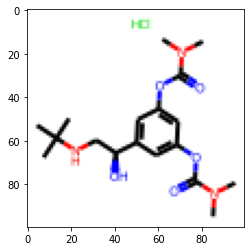

In [44]:
plt.imshow(x_treino[4])

In [48]:
# import pandas as pd
# y_treininho = pd.DataFrame(y_teste)
# y_treininho[0].value_counts()

In [45]:
# training a Label Encoder from the train set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_treino)

label_encoder.classes_

array([0., 1.])

In [46]:
print(f'X_train.shape: {x_treino.shape}')
print(f'y_train (classes): {np.unique(y_treino)}')
print(f'y_train.shape: {y_treino.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_train: {x_treino.min()}')
print(f'Max. value of X_train: {x_treino.max()}\n')

X_train.shape: (10647, 100, 100, 3)
y_train (classes): [0. 1.]
y_train.shape: (10647,)
Min. value of X_train: 0.0
Max. value of X_train: 1.02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


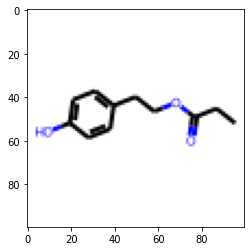

In [47]:
import matplotlib.pyplot as plt
plt.imshow(x_treino[0])

### 2.1 - Early Stopping ✋🏻

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center>Early stopping in neural networks is a technique that involves halting the training process when the model's performance on a validation dataset starts to degrade, in order to prevent overfitting.</center></td>
</tr>
</table><br/><br/><br/>


In [49]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


<div align="center">
    <h1> 3 - VVG16 - Architecture 🧠🤖</h1>
</div>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center><b>VGG16</b>, short for Visual Geometry Group 16, is a convolutional neural network architecture known for its deep layers and outstanding performance in image classification tasks. It was developed by the Visual Geometry Group at the University of Oxford. VGG16 consists of 16 weight layers, including 13 convolutional layers and 3 fully connected layers, making it one of the deeper architectures in the field. Its simplicity and uniform structure, with 3x3 convolutional filters and max-pooling layers, have made it a popular choice in computer vision applications. VGG16 has been influential in the development of subsequent neural network architectures and remains a valuable tool in deep learning for image analysis.</center></td>
</tr>
</table><br/><br/><br/>


### 3.1 - **`Transfer Learning `**
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center>Transfer learning is a machine learning technique that involves using knowledge gained from solving one task to improve performance on a different but related task. In the context of deep learning, it often means using pre-trained neural network models as a starting point for new tasks. Instead of training a neural network from scratch, transfer learning allows us to leverage the learned features and representations from a pre-existing model, which can significantly speed up training and improve results. Transfer learning has proven to be a valuable approach in various fields, including computer vision, natural language processing, and more, enabling the development of robust and efficient models with less data and computational resources</center></td>
</tr>
</table><br/><br/><br/>

In [51]:
# https://keras.io/api/applications/vgg/
# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=None,   # we will ignore the top layers that consists of the MLP classifier of VGG16
                   weights="imagenet", # we will use the weights learned for the ImageNet dataset
                   input_shape=(100, 100, 3))  # let's consider a smaller resolution than the original paper due to lack of memory


# freeze the base model weights ==> these weights won't be updated during training
# i.e., the weights of all layers from the base model are not updated
vgg16.trainable = False

In [52]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

🚨 This neural network only used part of VGG16. It also added new layers: 3 fully connected layers, each with 128 neurons, and a final layer with the sigmoid activation function.

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


model = Sequential([
    # our base model
    vgg16,
    
    Flatten(),
    
    # FC classifier
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,337,793
Trainable params: 623,105
Non-t

### 3.2 - The Importance of Transfer Learning: 
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center>Note that if transfer learning technique was not used, it would be necessary to 'learn' 15,337,793 parameters. However, by using the technique, it reduces to just 623,105.</center></td>
</tr>
</table><br/><br/><br/>

In [55]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_treino, y_treino, epochs=14, batch_size=32, validation_data=(x_teste, y_teste), callbacks=[early_stopping_cb])

Epoch 1/14
333/333 [==============================] - 53s 150ms/step - loss: 0.3560 - accuracy: 0.8432 - val_loss: 0.2889 - val_accuracy: 0.8839
Epoch 2/14
333/333 [==============================] - 49s 146ms/step - loss: 0.2822 - accuracy: 0.8833 - val_loss: 0.2788 - val_accuracy: 0.8820
Epoch 3/14
333/333 [==============================] - 49s 148ms/step - loss: 0.2591 - accuracy: 0.8960 - val_loss: 0.2716 - val_accuracy: 0.8869
Epoch 4/14
333/333 [==============================] - 54s 162ms/step - loss: 0.2575 - accuracy: 0.8962 - val_loss: 0.2729 - val_accuracy: 0.8888
Epoch 5/14
333/333 [==============================] - 56s 168ms/step - loss: 0.2324 - accuracy: 0.9096 - val_loss: 0.3105 - val_accuracy: 0.8655
Epoch 6/14
333/333 [==============================] - 55s 166ms/step - loss: 0.2317 - accuracy: 0.9096 - val_loss: 0.2768 - val_accuracy: 0.8858
Epoch 7/14
333/333 [==============================] - 57s 171ms/step - loss: 0.2114 - accuracy: 0.9165 - val_loss: 0.2850 - val_ac

### 3.3 - OPTIMIZERS
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center>Optimizers play a pivotal role in the training of neural networks, significantly impacting their convergence speed and final performance. These algorithms determine how the neural network adjusts its internal parameters during training to minimize the loss function.

One of the most widely used optimizers is the Adam optimizer. Adam, short for Adaptive Moment Estimation, combines the benefits of two other popular optimizers, RMSprop and Momentum. It employs adaptive learning rates for each parameter, which means it automatically adjusts the learning rates throughout the training process. This adaptability makes Adam particularly effective in handling a wide range of neural network architectures and tasks.

Adam calculates exponentially weighted moving averages of past gradients and their squared values to adaptively adjust the learning rates. This helps the optimizer converge quickly during the initial stages of training and then fine-tune the learning rates as it approaches convergence. As a result, Adam often achieves faster convergence and better optimization performance compared to many other optimizers.

In summary, optimizers are crucial for training neural networks efficiently, and Adam, with its adaptive learning rates and combination of effective techniques, has become a valuable tool in the deep learning community for a wide variety of tasks.</center></td>
</tr>
</table><br/><br/><br/>

In [56]:
# history_df.to_csv('history_df_NOVO.csv', index=False)

Text(0, 0.5, 'Accuracy')

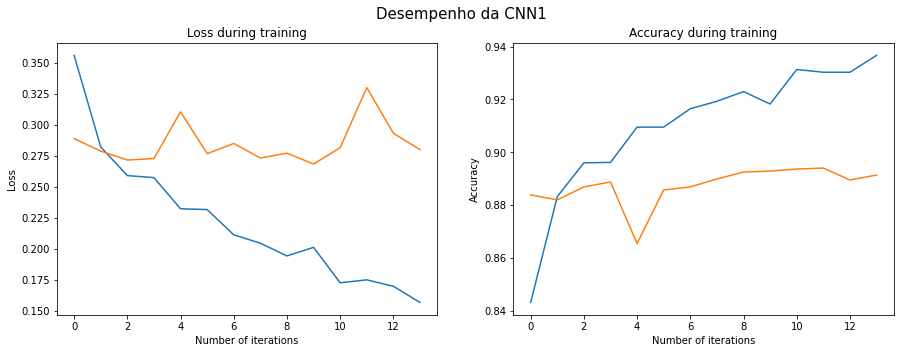

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Desempenho da CNN1', size=15)

axes[0].plot(history_df[['loss', 'val_loss']])
axes[0].set_title("Loss during training")
axes[0].set_xlabel("Number of iterations")
axes[0].set_ylabel("Loss")

axes[1].plot(history_df[['accuracy', 'val_accuracy']])
axes[1].set_title("Accuracy during training")
axes[1].set_xlabel("Number of iterations")
axes[1].set_ylabel("Accuracy")

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# def build_cnn(input_shape, n_classes):
#     model = Sequential([
#         Conv2D(filters=64, kernel_size=(4,4), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.5),
#         Conv2D(filters=64, kernel_size=(4,4), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.2),

#         Flatten(),

#         Dense(32, activation='relu'),
#         #Dense(256, activation='relu'),

        
#         Dense(n_classes, activation='sigmoid')
#     ])
    
#     return model

In [ ]:
# x_treino.shape

In [ ]:
# input_shape = (100, 100, 3)
# n_classes = 1
# model = build_cnn(input_shape, n_classes)
# opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# history2 = model.fit(x_treino, y_treino, epochs=100, batch_size=32, validation_data=(x_teste, y_teste), callbacks=[early_stopping_cb])

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# history_df = pd.DataFrame(history2.history)
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# fig.suptitle('Desempenho da CNN1', size=15)

# axes[0].plot(history_df[['loss', 'val_loss']])
# axes[0].set_title("Loss during training")
# axes[0].set_xlabel("Number of iterations")
# axes[0].set_ylabel("Loss")

# axes[1].plot(history_df[['accuracy', 'val_accuracy']])
# axes[1].set_title("Accuracy during training")
# axes[1].set_xlabel("Number of iterations")
# axes[1].set_ylabel("Accuracy")

In [ ]:
# #convertendo os valores:
# x_treino_float = X_train.astype('float')
# x_teste_float = X_test.astype('float')

# #normalizado:
# x_treino_normalizado = x_treino_float/255
# x_teste_normalizado = x_teste_float/255

In [ ]:
# plt.imshow(x_treino_float[2])

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# aug_data = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# treino_aumentado = aug_data.flow(x_treino_float, y_train, batch_size=200)
# model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
# n_passadas = int(x_treino_normalizado.shape[0]/200)
# historico = model.fit_generator(treino_aumentado, steps_per_epoch=n_passadas, epochs=10, validation_data=(x_teste_float, y_test))

In [ ]:
# history = model.fit(X_train[0:5000], y_train[0:5000], epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping_cb])

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# history_df_1 = pd.DataFrame(history.history)

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# fig.suptitle('Desempenho da CNN1', size=15)

# axes[0].plot(history_df_1[['loss', 'val_loss']])
# axes[0].set_title("Loss during training")
# axes[0].set_xlabel("Number of iterations")
# axes[0].set_ylabel("Loss")

# axes[1].plot(history_df_1[['accuracy', 'val_accuracy']])
# axes[1].set_title("Accuracy during training")
# axes[1].set_xlabel("Number of iterations")
# axes[1].set_ylabel("Accuracy")

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# def build_cnn2(input_shape, n_classes):
#     model = Sequential([
#         Conv2D(filters=32, kernel_size=(4,4), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.4),
#         Conv2D(filters=32, kernel_size=(4,4), activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.4),
#         Conv2D(filters=32, kernel_size=(4,4), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
        
        

#         Flatten(),

#         Dense(64, activation='relu'),
#         #Dense(256, activation='relu'),

        
#         Dense(n_classes, activation='softmax')
#     ])
    
#     return model

In [ ]:
# input_shape = (60, 100, 3)
# n_classes = 3
# model = build_cnn2(input_shape, n_classes)
# opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# history = model.fit(X_train[0:30000], y_train[0:30000], epochs=100, batch_size=32, validation_data=(X_test[0:40000], y_test[0:40000]), callbacks=[early_stopping_cb])

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# history_df_2 = pd.DataFrame(history.history)

# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# fig.suptitle('Desempenho da CNN1', size=15)

# axes[0].plot(history_df_2[['loss', 'val_loss']])
# axes[0].set_title("Loss during training")
# axes[0].set_xlabel("Number of iterations")
# axes[0].set_ylabel("Loss")

# axes[1].plot(history_df_2[['accuracy', 'val_accuracy']])
# axes[1].set_title("Accuracy during training")
# axes[1].set_xlabel("Number of iterations")
# axes[1].set_ylabel("Accuracy")

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# def build_cnn3(input_shape, n_classes):
#     model = Sequential([
#         Conv2D(filters=32, kernel_size=(4,4), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.4),
#         Conv2D(filters=32, kernel_size=(4,4), activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Conv2D(filters=32, kernel_size=(4,4), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
        
        

#         Flatten(),

#         Dense(64, activation='relu'),
#         #Dense(256, activation='relu'),

        
#         Dense(n_classes, activation='softmax')
#     ])
    
#     return model

In [ ]:
# input_shape = (60, 100, 3)
# n_classes = 3
# model = build_cnn3(input_shape, n_classes)
# opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# history = model.fit(X_train[0:30000], y_train[0:30000], epochs=100, batch_size=32, validation_data=(X_test[0:30000], y_test[0:30000]), callbacks=[early_stopping_cb])

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# def build_cnn4(input_shape, n_classes):
#     model = Sequential([
#         Conv2D(filters=64, kernel_size=(6,6), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.4),
#         Conv2D(filters=64, kernel_size=(6,6), activation='relu'),
#         MaxPool2D(pool_size=(2, 2)),
#         Dropout(0.4),
#         Conv2D(filters=64, kernel_size=(6,6), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
        
        

#         Flatten(),

#         Dense(64, activation='relu'),
#         Dense(64, activation='relu'),
#         Dense(64, activation='relu'),
#         #Dense(256, activation='relu'),

        
#         Dense(n_classes, activation='softmax')
#     ])
    
#     return model

In [ ]:
# input_shape = (60, 100, 3)
# n_classes = 3
# model = build_cnn4(input_shape, n_classes)
# opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# history = model.fit(X_train[0:28000], y_train[0:28000], epochs=100, batch_size=32, validation_data=(X_test[0:12000], y_test[0:12000]), callbacks=[early_stopping_cb])

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# history_df_3 = pd.DataFrame(history.history)

# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# fig.suptitle('Desempenho da CNN1', size=15)

# axes[0].plot(history_df_3[['loss', 'val_loss']])
# axes[0].set_title("Loss during training")
# axes[0].set_xlabel("Number of iterations")
# axes[0].set_ylabel("Loss")

# axes[1].plot(history_df_3[['accuracy', 'val_accuracy']])
# axes[1].set_title("Accuracy during training")
# axes[1].set_xlabel("Number of iterations")
# axes[1].set_ylabel("Accuracy")

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# def build_cnn5(input_shape, n_classes):
#     model = Sequential([
#         Conv2D(filters=64, kernel_size=(6,6), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
#         Dropout(0.5),
#         Conv2D(filters=64, kernel_size=(6,6), activation='relu'),
#         MaxPool2D(pool_size=(2, 2)),
#         Dropout(0.5),
#         Conv2D(filters=64, kernel_size=(6,6), input_shape=input_shape, activation='relu'),
#         MaxPool2D(pool_size=(2,2)),
        
        

#         Flatten(),

#         Dense(64, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(32, activation='relu'),
#         #Dense(256, activation='relu'),

        
#         Dense(n_classes, activation='softmax')
#     ])
    
#     return model

In [ ]:
# input_shape = (60, 100, 3)
# n_classes = 3
# model = build_cnn5(input_shape, n_classes)
# opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# history = model.fit(X_train[28000:56000], y_train[28000:56000], epochs=100, batch_size=32, validation_data=(X_test[5000:12000], y_test[5000:12000]), callbacks=[early_stopping_cb])

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

# modelo=Sequential()
# modelo.add(Conv2D(filters=32, kernel_size = 5, activation = 'relu', input_shape=(60, 100,3)))
# modelo.add(MaxPooling2D(pool_size=(2,2), strides=None, padding= 'same'))#valid = nao quer usar; qdo quer ativar 'same"
# modelo.add(Conv2D(filters=64, kernel_size = 5, activation = 'relu', input_shape=(60, 100,3)))
# modelo.add(MaxPooling2D(pool_size=(2,2), strides=None, padding= 'same'))
# modelo.add(Flatten())#como se cada matriz ficasse uma ao lado da outra, uma dimensao
# modelo.add(Dense(80, kernel_initializer='glorot_uniform', activation='relu'))
# modelo.add(Dropout(0.2))
# modelo.add(Dense(3, kernel_initializer='glorot_uniform', activation='softmax'))

In [ ]:
# modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history = modelo.fit(X_train[0:28000], y_train[0:28000], epochs=100, batch_size=32, validation_data=(X_test[0:12000], y_test[0:12000]), callbacks=[early_stopping_cb])

### 4.0 - Testing

In [58]:
from tensorflow import keras
# model = keras.models.load_model(r'C:\Users\PC\Desktop\Redes_Neurais_LUMIOS\modelo_rede_neural_lumios_NOVO')
model.evaluate(x_teste, y_teste)

84/84 [==============================] - 10s 115ms/step - loss: 0.2800 - accuracy: 0.8914


[0.2800480127334595, 0.8914350271224976]

In [59]:
y_test_proba = model.predict(x_teste)
y_test_proba

84/84 [==============================] - 10s 118ms/step


array([[0.02091111],
       [0.01688829],
       [0.00411539],
       ...,
       [0.06439591],
       [0.4576742 ],
       [0.9936511 ]], dtype=float32)

In [73]:
y_test_pred = []
for i in y_test_proba:
    if i > 0.5:
        a = 1
    else:
        a=0
    y_test_pred.append(a)

In [74]:
# y_test_pred

In [75]:
from sklearn.metrics import classification_report

class_names = label_encoder.classes_

print(classification_report(y_teste, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      1353
         1.0       0.87      0.92      0.89      1309

    accuracy                           0.89      2662
   macro avg       0.89      0.89      0.89      2662
weighted avg       0.89      0.89      0.89      2662



In [76]:
data = pd.DataFrame()

### 4.1 - Confusion Matrix ⊹

Classification report:
              precision    recall  f1-score   support

         0.0     0.9156    0.8662    0.8902      1353
         1.0     0.8690    0.9175    0.8926      1309

    accuracy                         0.8914      2662
   macro avg     0.8923    0.8919    0.8914      2662
weighted avg     0.8927    0.8914    0.8914      2662

Confusion matrix:


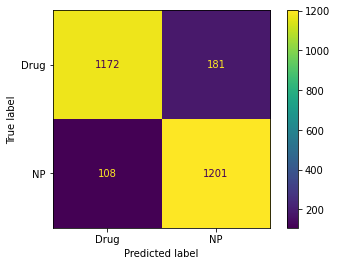

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
confusion_rf = confusion_matrix(y_teste, y_test_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_rf, display_labels=['Drug', 'NP'])
# Avaliação da qualidade do modelo

print("Classification report:")
print(classification_report(y_teste, y_test_pred, digits=4))

print("Confusion matrix:")
disp_rf.plot()

### Insights 
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center>From the analysis of the confusion matrix, it is evident that there are 108 natural product molecules that were classified as having drug-like patterns. Since the natural product class was considered class 1 (positive), and the drug class was class 0 (negative), these 108 molecules belong to the category of false negatives.</center></td>
</tr>
</table><br/><br/><br/>

In [78]:
# pd.DataFrame(y_teste).value_counts()

In [79]:
# y_teste.value_counts()

In [80]:
import pandas as pd
y_teste = pd.DataFrame(y_teste)

In [81]:
y_teste[0].iloc[0] ==0

True

In [82]:
y_test_pred[0]

0

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td><center>It is possible to identify which molecules belong to this class by identifying their indices, allowing for a more targeted analysis of these molecules sequentially.</center></td>
</tr>
</table><br/><br/><br/>


In [83]:
indexes = []
for i in range(len(y_teste)):
    if (y_teste[0].iloc[i] == 0) and (y_test_pred[i] == 1):
        indexes.append(y_teste.index[i])
print(indexes)

[20, 25, 40, 52, 65, 82, 84, 102, 135, 154, 157, 165, 184, 186, 187, 219, 238, 247, 255, 269, 278, 288, 289, 292, 299, 306, 319, 338, 339, 391, 398, 412, 420, 423, 464, 470, 475, 537, 582, 608, 609, 629, 643, 656, 667, 670, 678, 764, 858, 861, 864, 867, 878, 910, 919, 921, 926, 937, 975, 988, 1017, 1057, 1090, 1121, 1136, 1148, 1193, 1200, 1224, 1229, 1232, 1239, 1244, 1262, 1280, 1282, 1304, 1351, 1356, 1417, 1436, 1447, 1454, 1456, 1473, 1499, 1503, 1509, 1517, 1520, 1527, 1533, 1565, 1573, 1611, 1616, 1627, 1663, 1667, 1669, 1691, 1692, 1716, 1717, 1721, 1733, 1741, 1752, 1793, 1795, 1810, 1820, 1823, 1829, 1841, 1859, 1882, 1903, 1906, 1937, 1968, 1975, 1983, 1992, 1996, 2001, 2010, 2020, 2023, 2031, 2032, 2034, 2044, 2072, 2099, 2106, 2118, 2122, 2162, 2176, 2177, 2181, 2206, 2224, 2225, 2236, 2255, 2262, 2272, 2279, 2282, 2330, 2331, 2348, 2353, 2356, 2364, 2367, 2371, 2374, 2401, 2405, 2409, 2438, 2450, 2472, 2497, 2499, 2510, 2529, 2533, 2550, 2591, 2601, 2603, 2611, 2627, 2631

In [84]:
len(indexes)

181

### 5.0 - Saving the model ✅

In [89]:
from tensorflow import keras

# Suponha que 'modelo' é o seu modelo Keras
model.save('modelo_LUMIOS/saved_model')

INFO:tensorflow:Assets written to: modelo_LUMIOS/saved_model/assets


INFO:tensorflow:Assets written to: modelo_LUMIOS/saved_model/assets


### 5.1 - Loading model

In [90]:
# Para carregar o modelo posteriormente:
model_loaded = keras.models.load_model('modelo_LUMIOS/saved_model')

#### 5.2 - Testing the model

In [91]:
y_test_proba = model.predict(x_teste)
y_test_proba

84/84 [==============================] - 10s 120ms/step


array([[0.02091111],
       [0.01688829],
       [0.00411539],
       ...,
       [0.06439591],
       [0.4576742 ],
       [0.9936511 ]], dtype=float32)

In [92]:
y_test_pred = []
for i in y_test_proba:
    if i > 0.5:
        a = 1
    else:
        a=0
    y_test_pred.append(a)

In [93]:
from sklearn.metrics import classification_report

class_names = label_encoder.classes_

print(classification_report(y_teste, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      1353
         1.0       0.87      0.92      0.89      1309

    accuracy                           0.89      2662
   macro avg       0.89      0.89      0.89      2662
weighted avg       0.89      0.89      0.89      2662

